In [1]:
import os
import torch
from torch import nn
from PIL import Image
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from clipseg_model import CLIPSeg
from data.cub_parts_dataset import CUBPartsDataset, collate_fn

%load_ext autoreload
%autoreload 2

# Dataset

## CUB Parts

In [2]:
dataset_train = CUBPartsDataset('datasets/PASCUB', split='train')

# CLIPSeg

In [4]:
clip_seg = CLIPSeg()
state_dict = torch.load('PASCUB_runs/2024-04-08_23-44/checkpoint.pt', map_location='cpu')
clip_seg.load_state_dict(state_dict)

<class 'clipseg.configuration_clipseg.CLIPSegConfig'> 512


Some weights of CLIPSegForImageSegmentation were not initialized from the model checkpoint at CIDAS/clipseg-rd64-refined and are newly initialized: ['non_object_embedding', 'text_adapter.fc.0.weight', 'text_adapter.fc.2.weight', 'tunable_linear.weight', 'visual_adapter.fc.0.weight', 'visual_adapter.fc.2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [5]:
dataset_test = CUBPartsDataset('datasets/PASCUB', split='test')
dataloader_test = DataLoader(dataset=dataset_test, batch_size=4, shuffle=False, collate_fn=collate_fn)
dataloader_test_iter = iter(dataloader_test)

In [22]:
# inference
batch = next(dataloader_test_iter)
clip_seg.eval()
with torch.no_grad():
    logits, results = clip_seg(batch)

activation.shape torch.Size([32, 485, 768])


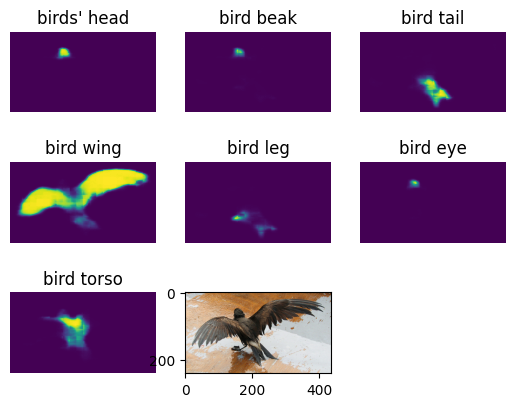

In [23]:
fig, axes = plt.subplots(3, 3)
for score_map, ax, text in zip(logits[0], axes.flatten(), clip_seg.part_texts):
    ax.imshow(score_map)
    ax.axis('off')
    ax.title.set_text(text)

axes[-1,-2].imshow(batch[2][0].permute(1,2,0))
fig.delaxes(axes[-1,-1])